In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v6/v5_FE_completed.xlsx')

In [ ]:
data.shape

(2893, 49)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   OpportunityID                         2893 non-null   object 
 1   Renewal_PreviousPace                  2893 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR   2893 non-null   float64
 3   Renewal_CountPreviousDeals            2893 non-null   int64  
 4   Renewal_PreviousCountBounces          2893 non-null   int64  
 5   Renewal_PreviousPosition              2893 non-null   int64  
 6   Renewal_PreviousHBwLCF                2893 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue       2893 non-null   float64
 8   Renewal_PreviousAvgDailyBalance       2893 non-null   float64
 9   Renewal_TwoWeekBounces                2893 non-null   int64  
 10  NumberOfBankStatements                2893 non-null   int64  
 11  BankStatement_MA_

In [ ]:
data.corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                    -0.104083
Renewal_CountPreviousDeals             -0.094531
f2_time_in_business                    -0.066142
Credit_Score__c                        -0.064775
f1_BankStatement_MA_OverdraftDays      -0.050916
f1_Renewal_PreviousPace                -0.050140
f2_Renewal_CountPreviousDeals          -0.048707
Renewal_PreviousPaidPercentageOfRTR    -0.041091
NumberOfBankStatements                 -0.038326
f2_NumberOfBankStat                    -0.038085
f3_Renewal_CountPreviousDeals          -0.028777
f3_time_business                       -0.021638
f1_Renewal_PreviousCountBounces        -0.020253
PctAvgDailybalance2AvgMonthlyRevenue   -0.019868
f2_credit_score                        -0.018276
Renewal_PreviousHBwLCF                 -0.015948
Renewal_PreviousAvgDailyBalance        -0.010823
AvgDailyBalance                        -0.009568
AvgMonthRevenue                        -0.008141
f3_credit_score                        -0.005496
f3_NumberOfBankStat 

In [ ]:
data.drop(['FundedWriteOffAmount_Net','FundedWriteOffAmount_Gross'],axis = 1).corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                    -0.104083
Renewal_CountPreviousDeals             -0.094531
f2_time_in_business                    -0.066142
Credit_Score__c                        -0.064775
f1_BankStatement_MA_OverdraftDays      -0.050916
f1_Renewal_PreviousPace                -0.050140
f2_Renewal_CountPreviousDeals          -0.048707
Renewal_PreviousPaidPercentageOfRTR    -0.041091
NumberOfBankStatements                 -0.038326
f2_NumberOfBankStat                    -0.038085
f3_Renewal_CountPreviousDeals          -0.028777
f3_time_business                       -0.021638
f1_Renewal_PreviousCountBounces        -0.020253
PctAvgDailybalance2AvgMonthlyRevenue   -0.019868
f2_credit_score                        -0.018276
Renewal_PreviousHBwLCF                 -0.015948
Renewal_PreviousAvgDailyBalance        -0.010823
AvgDailyBalance                        -0.009568
AvgMonthRevenue                        -0.008141
f3_credit_score                        -0.005496
f3_NumberOfBankStat 

In [ ]:
data.shape

(2893, 49)

### Model Training

In [ ]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [ ]:
X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID','FundedWriteOffAmount_Gross',
              'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
              'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
y = data['WriteOff_YN']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Renewal_PreviousPace                 2893 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR  2893 non-null   float64
 2   Renewal_CountPreviousDeals           2893 non-null   int64  
 3   Renewal_PreviousCountBounces         2893 non-null   int64  
 4   Renewal_PreviousPosition             2893 non-null   int64  
 5   Renewal_PreviousHBwLCF               2893 non-null   float64
 6   Renewal_PreviousAvgMonthRevenue      2893 non-null   float64
 7   Renewal_PreviousAvgDailyBalance      2893 non-null   float64
 8   Renewal_TwoWeekBounces               2893 non-null   int64  
 9   NumberOfBankStatements               2893 non-null   int64  
 10  BankStatement_MA_OverdraftDays       2893 non-null   float64
 11  BankStatement_MA_NumReturnItem

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2314, 39)
Shape of x_test is: (579, 39)
----------------------------------------------
Shape of y_train is: (2314,)
Shape of y_test is: (579,)


In [ ]:
#checking the skewness
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [ ]:
#checking the skewness
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit 
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [ ]:
quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
quantile_1

942.5125

In [ ]:
quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
quantile_2

3651.235

In [ ]:
quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
quantile_3

8795.415

In [ ]:
weight = []
for i in data.index:
  if data['WriteOff_YN'][i] == 0:
    weight.append(1.0)
  else:
    if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
      weight.append(1.25)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
      weight.append(1.5)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
      weight.append(2.0)
    else:
      weight.append(2.25)

weight = np.array(weight)
len(weight)

2893

In [ ]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [ ]:
# median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
# median_WO

In [ ]:
# weight = []
# for i in data.index:
#   if data['FundedWriteOffAmount_Gross'][i] > median_WO:
#     weight.append(2)
#   else:
#     weight.append(1)
# weight = np.array(weight)
# len(weight)

In [ ]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [ ]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0],
    'reg_lambda':[10], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1]
} 

In [ ]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic') #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl, 
                   param_grid=parameters, 
                   scoring='roc_auc',
                   n_jobs=-1, 
                   cv=5, 
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

39

In [ ]:
# best parameters after training
clf.best_estimator_

XGBClassifier(eval_metric='aucpr', gamma=0.25, learning_rate=0.3,
              n_estimators=30, reg_lambda=10, subsample=0.3,
              use_label_encoder=False)

In [ ]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'n_estimators': 30,
 'reg_alpha': 0,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.3,
 'use_label_encoder': False}

In [ ]:
predict_y_test = clf.predict(X_test)
predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)

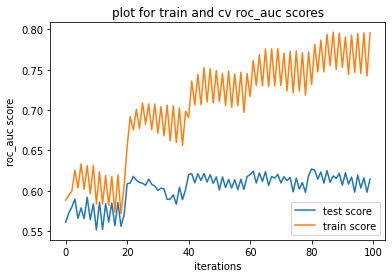

In [ ]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score

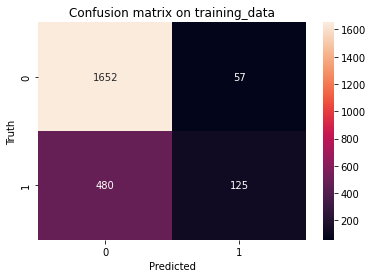

----------------------------
TP: 125
TN: 1652
FP: 57
FN: 480
F1-score: 0.3176620076238882
accuracy: 0.7679343128781331
Precision: 0.6868131868131868
Recall: 0.2066115702479339


In [ ]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

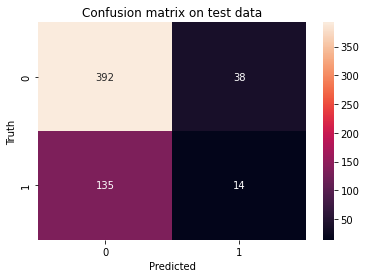

----------------------------
----------------------------
TP: 14
TN: 392
FP: 38
FN: 135
----------------------------
F1-score: 0.13930348258706465
accuracy: 0.7012089810017271
Precision: 0.2692307692307692
Recall: 0.09395973154362416


In [ ]:
# on test set 
sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

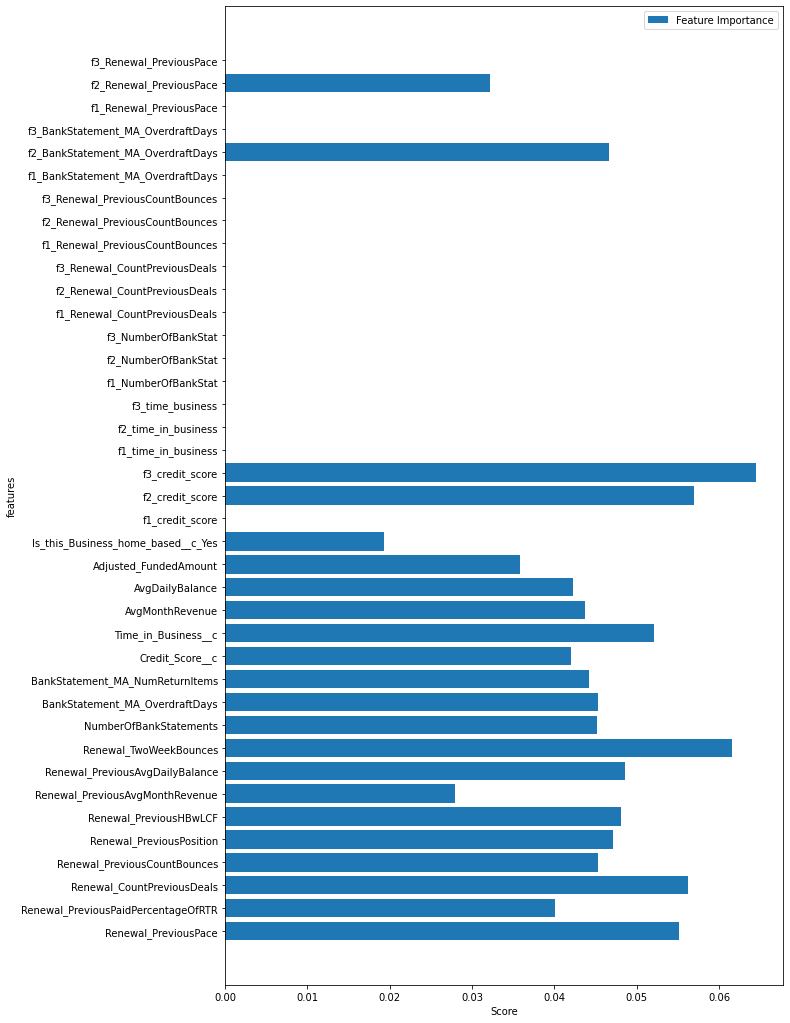

In [ ]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

# For Train data

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
163,0
1932,0
252,0
2380,1
1435,1
...,...
1638,0
1095,0
1130,1
1294,0


In [ ]:
check['Predicted Values'] = predict_y_train

In [ ]:
check

,WriteOff_YN,Predicted Values
163,0,0
1932,0,0
252,0,0
2380,1,0
1435,1,0
...,...,...
1638,0,0
1095,0,0
1130,1,0
1294,0,0


In [ ]:
predict_y_proba_train

array([[0.7430104 , 0.25698963],
       [0.9091851 , 0.09081491],
       [0.6999855 , 0.30001447],
       ...,
       [0.5410516 , 0.45894834],
       [0.5842678 , 0.4157322 ],
       [0.56976926, 0.4302307 ]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
163,0,0,0.256990
1932,0,0,0.090815
252,0,0,0.300014
2380,1,0,0.161399
1435,1,0,0.195776
...,...,...,...
1638,0,0,0.147630
1095,0,0,0.258748
1130,1,0,0.458948
1294,0,0,0.415732


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
163,0,0,0.256990,0062M00000lrdWyQAI
1932,0,0,0.090815,0062M00000mTGsbQAG
252,0,0,0.300014,0062M00000cpcUvQAI
2380,1,0,0.161399,0062M00000nZ6WqQAK
1435,1,0,0.195776,0062M00000jxwFEQAY
...,...,...,...,...
1638,0,0,0.147630,0062M00000nnDqoQAE
1095,0,0,0.258748,0062M00000mfz6iQAA
1130,1,0,0.458948,0062M00000lXQWMQA4
1294,0,0,0.415732,0062M00000gYPhQQAW


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.82823306
Min_propability_value:  0.025373593


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [ ]:
check['Pentile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.80):
    d=5
    funded_amt_d5= funded_amt_d5+data['Adjusted_FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['Adjusted_FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['Adjusted_FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['Adjusted_FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
  
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['Adjusted_FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
  check['Pentile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
163,0,0,0.256990,0062M00000lrdWyQAI,3
1932,0,0,0.090815,0062M00000mTGsbQAG,1
252,0,0,0.300014,0062M00000cpcUvQAI,4
2380,1,0,0.161399,0062M00000nZ6WqQAK,2
1435,1,0,0.195776,0062M00000jxwFEQAY,3
...,...,...,...,...,...
1638,0,0,0.147630,0062M00000nnDqoQAE,2
1095,0,0,0.258748,0062M00000mfz6iQAA,3
1130,1,0,0.458948,0062M00000lXQWMQA4,5
1294,0,0,0.415732,0062M00000gYPhQQAW,5


In [ ]:
check[check['Pentile'] == 1].sort_values(by='Predicted_Prob_WO = 1').head(20)

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
1374,0,0,0.025374,0062M00000iciIfQAI,1
1345,0,0,0.030340,0062M00000l0tVqQAI,1
2538,0,0,0.037685,0062M00000itRUCQA2,1
696,0,0,0.039316,0062M00000kylvVQAQ,1
1205,0,0,0.039790,0062M00000lqXiDQAU,1
1056,0,0,0.041297,0062M00000iDEdgQAG,1
2708,0,0,0.041838,0062M00000kxY3XQAU,1
2872,0,0,0.041879,0062M00000o7yiwQAA,1
979,0,0,0.042570,0062M00000issABQAY,1
1884,0,0,0.044400,0062M00000jyYflQAE,1


In [ ]:
check['Predicted_Prob_WO = 1'].max()

0.82823306

In [ ]:
check['Predicted_Prob_WO = 1'].quantile(0.8)

0.37425682544708255

In [ ]:
len(check[check['Pentile']==5])

463

In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
1374,0,0,0.025374,0062M00000iciIfQAI,1
1345,0,0,0.030340,0062M00000l0tVqQAI,1
2538,0,0,0.037685,0062M00000itRUCQA2,1
696,0,0,0.039316,0062M00000kylvVQAQ,1
1205,0,0,0.039790,0062M00000lqXiDQAU,1
...,...,...,...,...,...
392,0,1,0.759575,0062M00000mUmeIQAS,5
487,0,1,0.766829,0062M00000lvmVMQAY,5
0,1,1,0.775600,0062M00000iapiRQAQ,5
2223,1,1,0.823433,0062M00000lULptQAG,5


In [ ]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
1374,0,0,0.025374,0062M00000iciIfQAI,1
1345,0,0,0.030340,0062M00000l0tVqQAI,1
2538,0,0,0.037685,0062M00000itRUCQA2,1
696,0,0,0.039316,0062M00000kylvVQAQ,1
1205,0,0,0.039790,0062M00000lqXiDQAU,1
...,...,...,...,...,...
392,0,1,0.759575,0062M00000mUmeIQAS,5
487,0,1,0.766829,0062M00000lvmVMQAY,5
0,1,1,0.775600,0062M00000iapiRQAQ,5
2223,1,1,0.823433,0062M00000lULptQAG,5


In [ ]:
# # sorted dataframe
# exp_df = exp_df.sort_values(by=['Predicted_Prob_WO = 1'], ascending = False)

In [ ]:
len(exp_df[exp_df['Pentile']==1])

463

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [ ]:
N = len(exp_df)
N

2314

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

605

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    434
1     29
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(29, 75, 101, 146, 254)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(29, 104, 205, 351, 605)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

6.263498920086393 16.198704103671705 21.861471861471863 31.533477321814257 54.85961123110151


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile 
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles, 
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

4.793388429752066 17.1900826446281 33.88429752066116 58.01652892561984 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses 

- The value of lift in case of good model should be high.s

In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)
print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.2396694214876033 0.4297520661157025 0.5647382920110193 0.725206611570248 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]

In [ ]:
max_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].max()]
max_range

[0.1324913, 0.19280167, 0.2625704, 0.3742246, 0.82823306]

In [ ]:
min_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].min()]
min_range

[0.025373593, 0.13276617, 0.19305143, 0.26385233, 0.37430516]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [ ]:
no_of_opps

[463, 463, 462, 463, 463]

In [ ]:
funded_amt

[9284299.0, 8144287.0, 10406857.0, 9354825.92, 10853421.93]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.193247  , 0.16951835, 0.21661235, 0.19471497, 0.22590733])

In [ ]:
gross_amt

[151444.4, 484031.70999999996, 758313.06, 1149108.21, 2651254.4900000016]

In [ ]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.029156713894851898,
 0.12234453783885989,
 0.2683381627807505,
 0.48956931634730955,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.016311883105014174,
 0.05943205464149286,
 0.07286667434749992,
 0.12283587314471374,
 0.2442782107891388]

In [ ]:
dict_try = {"Pentile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WriteOff": rr,
            "Cumulative_Unit_WOs" : cg,
            'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded$':funded_amt_pct,
            'Funded_WO_Gross$':gross_amt,
            '%_Funded_WO_Gross$':gross_amt_pct,
            "Cumulative_$_WOs" :cum_gross_pct,
            'Max_Range': max_range,
            'Min_Range': min_range}

final_df = pd.DataFrame(dict_try)
final_df


,Pentile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,%_Funded$,Funded_WO_Gross$,%_Funded_WO_Gross$,Cumulative_$_WOs,Max_Range,Min_Range
0,1,463,29,6.263499,4.793388,0.239669,9284299.00,0.193247,151444.40,0.016312,0.029157,0.132491,0.025374
1,2,463,75,16.198704,17.190083,0.429752,8144287.00,0.169518,484031.71,0.059432,0.122345,0.192802,0.132766
2,3,462,101,21.861472,33.884298,0.564738,10406857.00,0.216612,758313.06,0.072867,0.268338,0.262570,0.193051
3,4,463,146,31.533477,58.016529,0.725207,9354825.92,0.194715,1149108.21,0.122836,0.489569,0.374225,0.263852
4,5,463,254,54.859611,100.000000,1.000000,10853421.93,0.225907,2651254.49,0.244278,1.000000,0.828233,0.374305


In [ ]:
final_df['%_Funded$'] = 100*final_df['%_Funded$']
final_df['%_Funded_WO_Gross$'] = 100*final_df['%_Funded_WO_Gross$']
final_df['Cumulative_$_WOs'] = 100*final_df['Cumulative_$_WOs']
final_df

,Pentile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,%_Funded$,Funded_WO_Gross$,%_Funded_WO_Gross$,Cumulative_$_WOs,Max_Range,Min_Range
0,1,463,29,6.263499,4.793388,0.239669,9284299.00,19.324700,151444.40,1.631188,2.915671,0.132491,0.025374
1,2,463,75,16.198704,17.190083,0.429752,8144287.00,16.951835,484031.71,5.943205,12.234454,0.192802,0.132766
2,3,462,101,21.861472,33.884298,0.564738,10406857.00,21.661235,758313.06,7.286667,26.833816,0.262570,0.193051
3,4,463,146,31.533477,58.016529,0.725207,9354825.92,19.471497,1149108.21,12.283587,48.956932,0.374225,0.263852
4,5,463,254,54.859611,100.000000,1.000000,10853421.93,22.590733,2651254.49,24.427821,100.000000,0.828233,0.374305


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of 
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier 
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 5 artists>

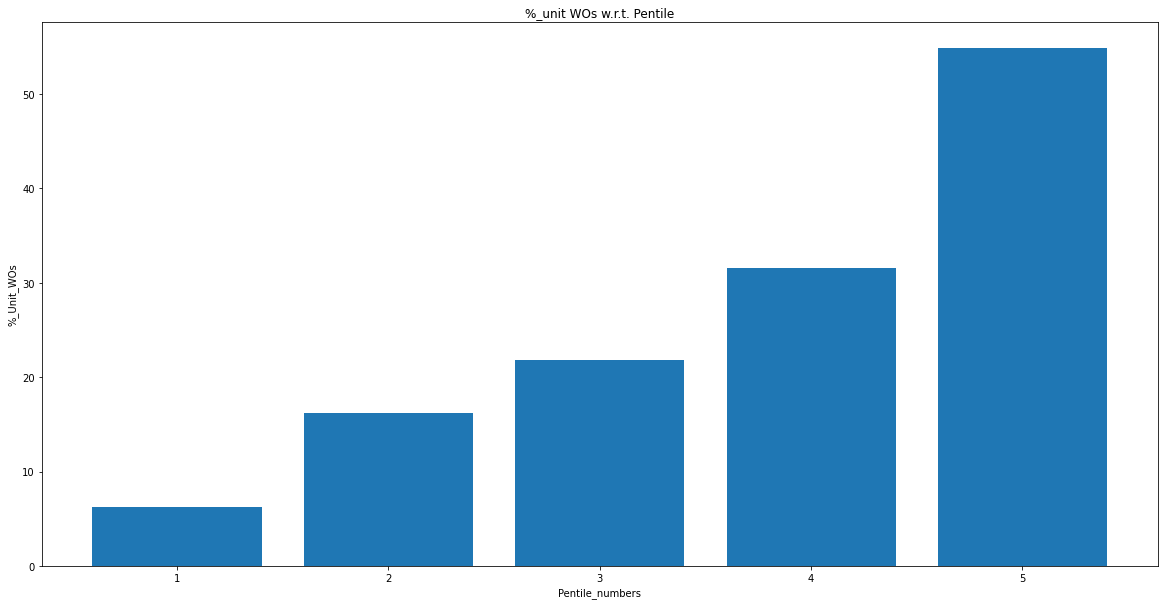

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Pentile")
plt.bar(final_df['Pentile'],final_df['%_Unit_WriteOff'])

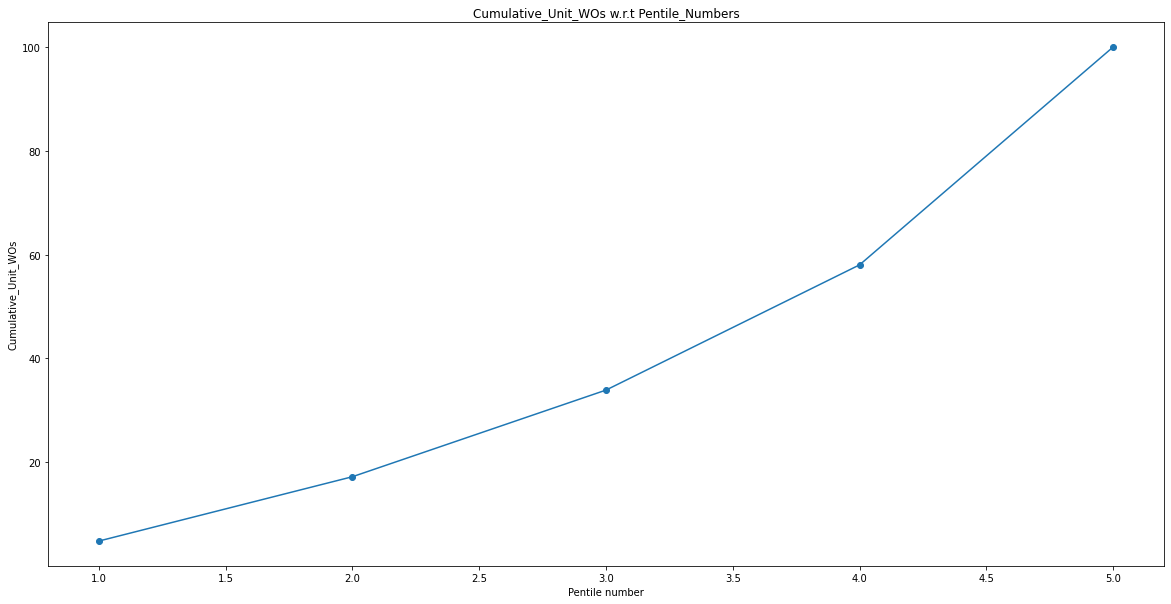

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Cumulative_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

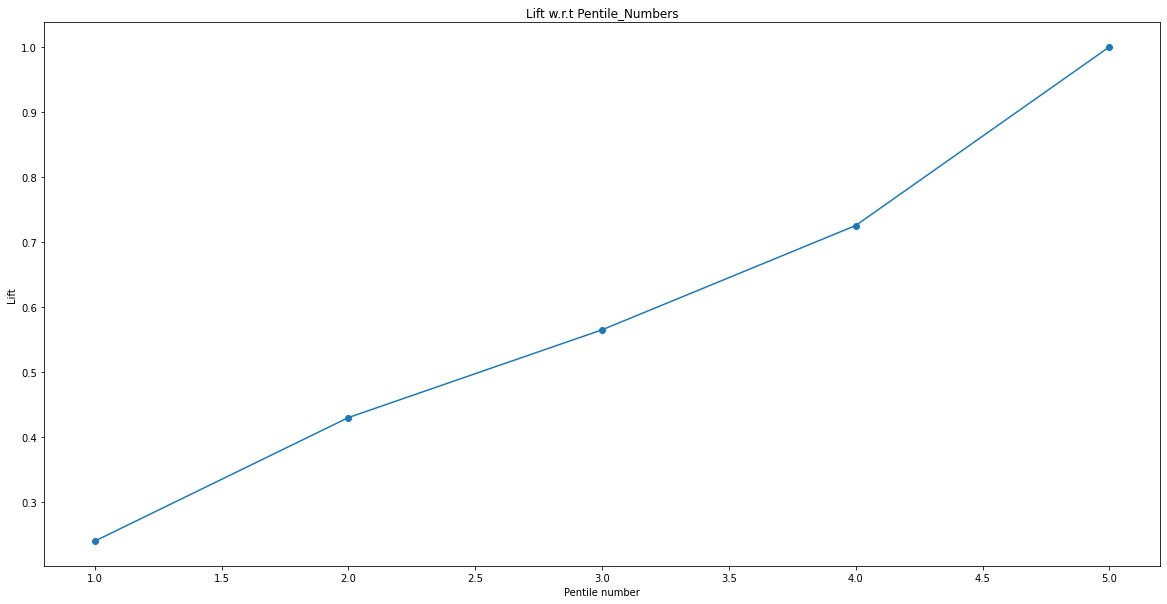

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Lift")
plt.title("Lift w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Lift'],marker='o')

# For Test data

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
1905,0
1055,0
2471,0
1133,0
1200,0
...,...
1777,0
237,0
2091,0
109,0


In [ ]:
check['Predicted Values'] = predict_y_test

In [ ]:
check

,WriteOff_YN,Predicted Values
1905,0,0
1055,0,0
2471,0,0
1133,0,0
1200,0,0
...,...,...
1777,0,0
237,0,0
2091,0,0
109,0,0


In [ ]:
predict_y_proba_test

array([[0.6156286 , 0.38437143],
       [0.8876169 , 0.11238316],
       [0.82407296, 0.17592707],
       ...,
       [0.86037636, 0.13962364],
       [0.50013196, 0.49986807],
       [0.85820365, 0.14179634]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
1905,0,0,0.384371
1055,0,0,0.112383
2471,0,0,0.175927
1133,0,0,0.220669
1200,0,0,0.075527
...,...,...,...
1777,0,0,0.130881
237,0,0,0.085784
2091,0,0,0.139624
109,0,0,0.499868


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
1905,0,0,0.384371,0062M00000lVy7wQAC
1055,0,0,0.112383,0062M00000id4PtQAI
2471,0,0,0.175927,0062M00000mhXXtQAM
1133,0,0,0.220669,0062M00000iqzMvQAI
1200,0,0,0.075527,0062M00000n0LF4QAM
...,...,...,...,...
1777,0,0,0.130881,0062M00000n0cnyQAA
237,0,0,0.085784,0062M00000di4c2QAA
2091,0,0,0.139624,0062M00000l0bHTQAY
109,0,0,0.499868,0062M00000nGKiDQAW


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.7981526
Min_propability_value:  0.04397184


In [ ]:
# check.drop('Decile',axis = 'columns',inplace = True)

In [ ]:
check['Pentile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[4]:
    d=5
    funded_amt_d5 = funded_amt_d5+data['Adjusted_FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['Adjusted_FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['Adjusted_FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['Adjusted_FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['Adjusted_FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
  check['Pentile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
1905,0,0,0.384371,0062M00000lVy7wQAC,5
1055,0,0,0.112383,0062M00000id4PtQAI,1
2471,0,0,0.175927,0062M00000mhXXtQAM,2
1133,0,0,0.220669,0062M00000iqzMvQAI,3
1200,0,0,0.075527,0062M00000n0LF4QAM,1
...,...,...,...,...,...
1777,0,0,0.130881,0062M00000n0cnyQAA,1
237,0,0,0.085784,0062M00000di4c2QAA,1
2091,0,0,0.139624,0062M00000l0bHTQAY,2
109,0,0,0.499868,0062M00000nGKiDQAW,5


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2547,0,0,0.043972,0062M00000nXCpOQAW,1
2580,0,0,0.045575,0062M00000jKtAxQAK,1
807,0,0,0.046339,0062M00000gYjCUQA0,1
1375,1,0,0.050347,0062M00000k0sMZQAY,1
727,0,0,0.052825,0062M00000mgXydQAE,1
...,...,...,...,...,...
2650,0,1,0.697700,0062M00000nr7FsQAI,5
565,0,1,0.732321,0062M00000nY6hoQAC,5
2304,1,1,0.780319,0062M00000n1aqqQAA,5
433,0,1,0.796104,0062M00000npmOVQAY,5


In [ ]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2547,0,0,0.043972,0062M00000nXCpOQAW,1
2580,0,0,0.045575,0062M00000jKtAxQAK,1
807,0,0,0.046339,0062M00000gYjCUQA0,1
1375,1,0,0.050347,0062M00000k0sMZQAY,1
727,0,0,0.052825,0062M00000mgXydQAE,1
...,...,...,...,...,...
2650,0,1,0.697700,0062M00000nr7FsQAI,5
565,0,1,0.732321,0062M00000nY6hoQAC,5
2304,1,1,0.780319,0062M00000n1aqqQAA,5
433,0,1,0.796104,0062M00000npmOVQAY,5


In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2547,0,0,0.043972,0062M00000nXCpOQAW,1
2580,0,0,0.045575,0062M00000jKtAxQAK,1
807,0,0,0.046339,0062M00000gYjCUQA0,1
1375,1,0,0.050347,0062M00000k0sMZQAY,1
727,0,0,0.052825,0062M00000mgXydQAE,1
...,...,...,...,...,...
2650,0,1,0.697700,0062M00000nr7FsQAI,5
565,0,1,0.732321,0062M00000nY6hoQAC,5
2304,1,1,0.780319,0062M00000n1aqqQAA,5
433,0,1,0.796104,0062M00000npmOVQAY,5


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [ ]:
N = len(exp_df)
N

579

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

149

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    104
1     19
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(19, 25, 29, 30, 46)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(19, 44, 73, 103, 149)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

15.447154471544716 21.551724137931036 25.43859649122807 28.571428571428573 38.01652892561984


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

12.751677852348994 29.53020134228188 48.99328859060403 69.12751677852349 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)

print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.6375838926174497 0.738255033557047 0.8165548098434006 0.8640939597315436 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [ ]:
no_of_opps

[123, 116, 114, 105, 121]

In [ ]:
sum([123, 116, 114, 105, 121])

579

In [ ]:
funded_amt

[3889850.0, 2998900.0, 2708725.0, 2601125.0, 2955317.79]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.2566894 , 0.19789602, 0.17874751, 0.17164703, 0.19502005])

In [ ]:
gross_amt

[113158.03, 485215.84, 372642.97000000003, 366884.55, 379897.85]

In [ ]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.06587383866813212,
 0.34833748674845144,
 0.5652679413224097,
 0.7788461881028659,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.029090589611424605,
 0.16179793924438962,
 0.13757135552704686,
 0.14104841174491806,
 0.12854720777761094]

In [ ]:
dict_try = {"Pentile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WriteOff": rr,
            "Cumulative_Unit_WOs" : cg,
            'Lift': lift,
            'Funded_$':funded_amt,
            'Funded$_%':funded_amt_pct,
            'Funded_WO_Gross':gross_amt,
            'Funded_WO_Gross$_%':gross_amt_pct,
            "Cumulative_$ WOs" :cum_gross_pct,
            'Max_Range': max_range,
            'Min_Range': min_range}

final_df = pd.DataFrame(dict_try)
final_df


,Pentile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,Funded$_%,Funded_WO_Gross,Funded_WO_Gross$_%,Cumulative_$ WOs,Max_Range,Min_Range
0,1,123,19,15.447154,12.751678,0.637584,3889850.00,0.256689,113158.03,0.029091,0.065874,0.132491,0.025374
1,2,116,25,21.551724,29.530201,0.738255,2998900.00,0.197896,485215.84,0.161798,0.348337,0.192802,0.132766
2,3,114,29,25.438596,48.993289,0.816555,2708725.00,0.178748,372642.97,0.137571,0.565268,0.262570,0.193051
3,4,105,30,28.571429,69.127517,0.864094,2601125.00,0.171647,366884.55,0.141048,0.778846,0.374225,0.263852
4,5,121,46,38.016529,100.000000,1.000000,2955317.79,0.195020,379897.85,0.128547,1.000000,0.828233,0.374305


In [ ]:
final_df['Funded$_%'] = 100*final_df['Funded$_%']
final_df['Funded_WO_Gross$_%'] = 100*final_df['Funded_WO_Gross$_%']
final_df['Cumulative_$ WOs'] = 100*final_df['Cumulative_$ WOs']
final_df

,Pentile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,Funded$_%,Funded_WO_Gross,Funded_WO_Gross$_%,Cumulative_$ WOs,Max_Range,Min_Range
0,1,123,19,15.447154,12.751678,0.637584,3889850.00,25.668940,113158.03,2.909059,6.587384,0.132491,0.025374
1,2,116,25,21.551724,29.530201,0.738255,2998900.00,19.789602,485215.84,16.179794,34.833749,0.192802,0.132766
2,3,114,29,25.438596,48.993289,0.816555,2708725.00,17.874751,372642.97,13.757136,56.526794,0.262570,0.193051
3,4,105,30,28.571429,69.127517,0.864094,2601125.00,17.164703,366884.55,14.104841,77.884619,0.374225,0.263852
4,5,121,46,38.016529,100.000000,1.000000,2955317.79,19.502005,379897.85,12.854721,100.000000,0.828233,0.374305


<BarContainer object of 5 artists>

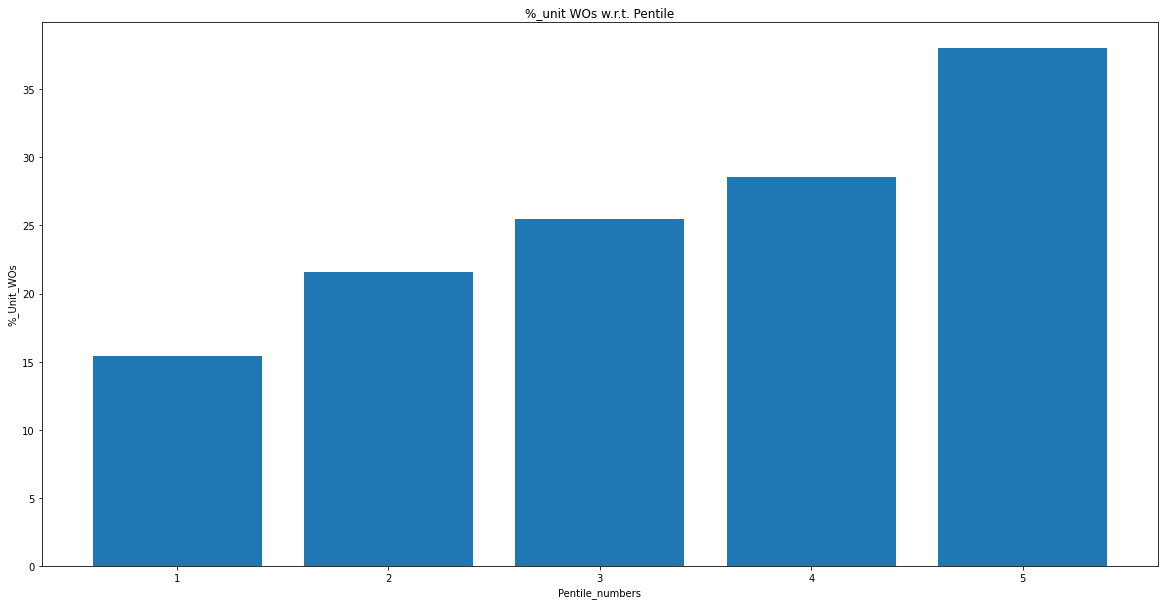

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Pentile")
plt.bar(final_df['Pentile'],final_df['%_Unit_WriteOff'])

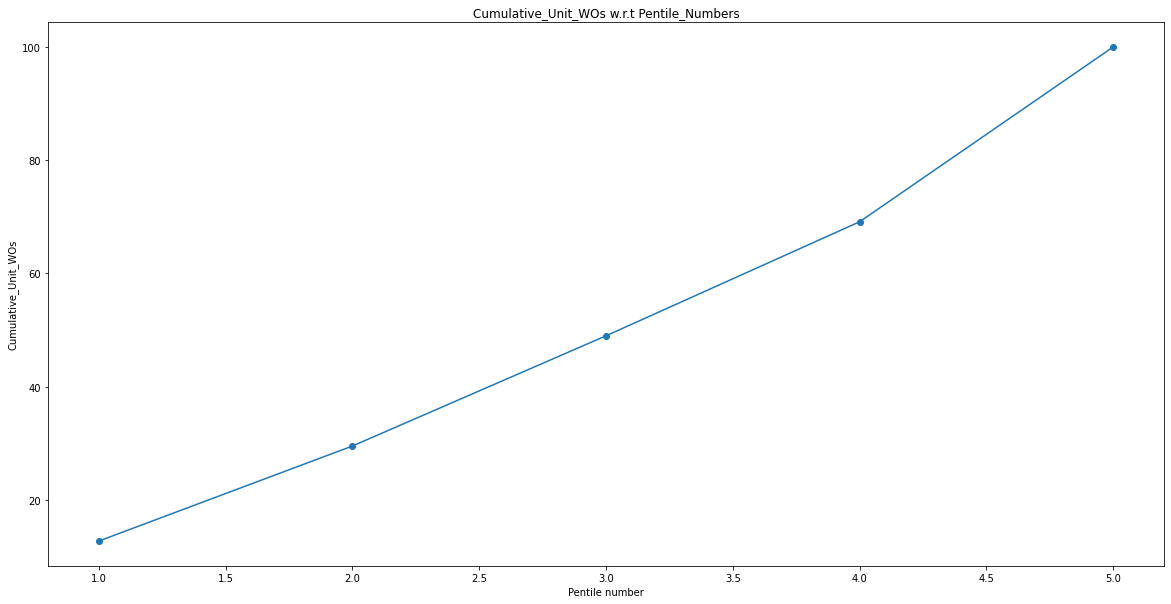

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Cumulative_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

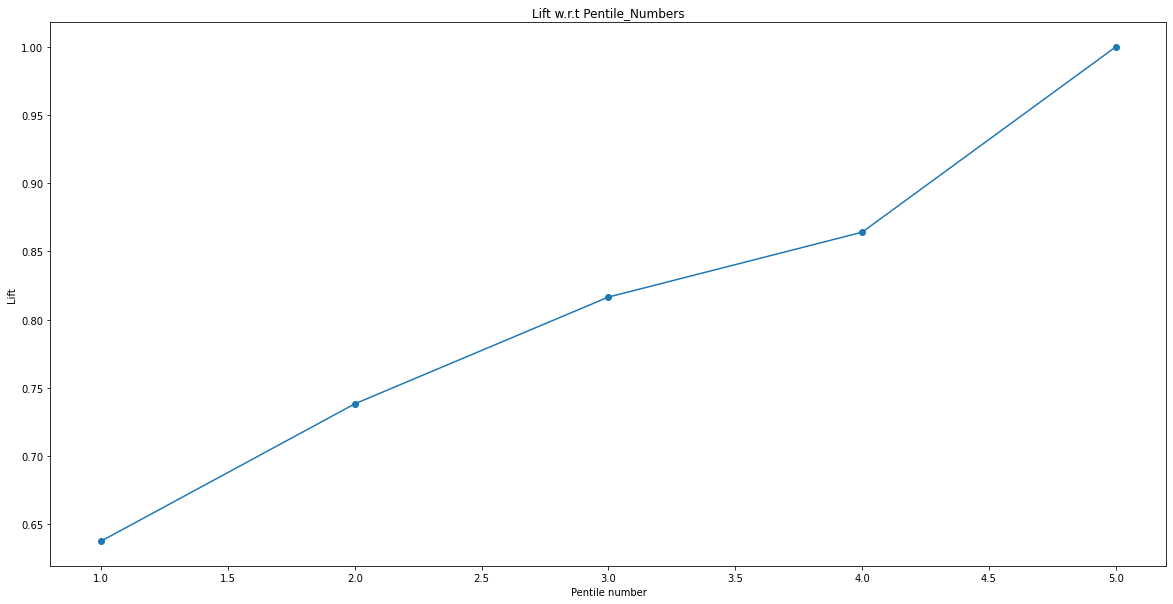

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Lift")
plt.title("Lift w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Lift'],marker='o')